In [1]:
!pip install torchvision torch

In [0]:
!pip install -q kaggle

In [3]:
from google.colab import files
js = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir ~/.kaggle

In [0]:
cp kaggle.json ~/.kaggle

In [6]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 100MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 74.7MB/s]
  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 151MB/s]


In [7]:
!pwd

/content


In [8]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [46]:
!wget https://data.deepai.org/mnist.zip

--2020-01-25 20:44:47--  https://data.deepai.org/mnist.zip
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11600687 (11M) [application/zip]
Saving to: ‘mnist.zip’

mnist.zip           100%[===================>]  11.06M  11.0MB/s    in 1.0s    

2020-01-25 20:44:49 (11.0 MB/s) - ‘mnist.zip’ saved [11600687/11600687]



In [47]:
!unzip mnist.zip

Archive:  mnist.zip
  inflating: t10k-images-idx3-ubyte.gz  
   creating: __MACOSX/
  inflating: __MACOSX/._t10k-images-idx3-ubyte.gz  
  inflating: t10k-labels-idx1-ubyte.gz  
  inflating: __MACOSX/._t10k-labels-idx1-ubyte.gz  
  inflating: train-images-idx3-ubyte.gz  
  inflating: __MACOSX/._train-images-idx3-ubyte.gz  
  inflating: train-labels-idx1-ubyte.gz  
  inflating: __MACOSX/._train-labels-idx1-ubyte.gz  


In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
torch.manual_seed(1)

In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [0]:
Xtrain, ytrain = train_data.loc[:, 'pixel0':].values.astype('float32'), train_data.loc[:,'label'].values.astype('float32')

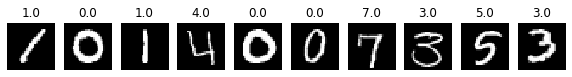

In [13]:
fig = plt.figure(figsize=(10,10))
for i in range(1,11):
  ax = fig.add_subplot(1,10,i)
  ax.set_title(ytrain[i-1])
  ax.axis('off')
  plt.imshow(np.reshape(Xtrain[i-1,:],(28,28)),cmap='gray')
plt.show()

In [0]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=64, kernel_size=5, stride = 1, padding = 2),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Dropout(p=0.25)
    )
    
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Dropout(p=0.25)
    )
    
    # self.conv3 = nn.Sequential(
    #     nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size=5, stride = 1, padding=2),
    #     nn.MaxPool2d(2),
    #     nn.ReLU(),
    #     nn.Dropout(p=0.25)
    # )
    

    self.fc1 = nn.Linear(128*7*7, 1024)
    self.batchNorm = nn.BatchNorm1d(1024)
    self.out = nn.Linear(1024, 10)

  def forward(self, x):
    x = self.conv1(x)
    # x = self.batchNorm1(x)
    x = self.conv2(x)
    # x = self.batchNorm2(x)
    # x = self.conv3(x)
    # x = self.batchNorm3(x)
    # print(x.size())
    x = x.view(x.size(0),-1)
    # print(x.size())
    x = self.fc1(x)
    x = self.batchNorm(x)
    output = self.out(x)
    return x, output

cnn = CNN().cuda()

In [36]:
cnn 


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
  )
  (fc1): Linear(in_features=6272, out_features=1024, bias=True)
  (batchNorm): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=1024, out_features=10, bias=True)
)

In [0]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.01)
loss_func = nn.CrossEntropyLoss()

In [38]:
train_data.values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [0]:
trainingX = torch.Tensor(Xtrain)
trainingY = torch.Tensor(ytrain)
trainingX = trainingX/255.
trainingY = trainingY

In [40]:
print(trainingX)
print(trainingY)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([1., 0., 1.,  ..., 7., 6., 9.])


In [41]:
print(trainingX.size())
print(trainingY.size())
training = Data.TensorDataset(trainingX, trainingY)
train_loader = Data.DataLoader(dataset=training, batch_size = 256, shuffle=True)
testing = test_data.values
testing = torch.from_numpy(testing)
testing = testing.type(torch.FloatTensor)/255.
print(type(testing))
print(testing)
print(train_loader)

torch.Size([42000, 784])
torch.Size([42000])
<class 'torch.Tensor'>
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [42]:
for i in range(500):
  for x,y in train_loader:
    # print(_t)
    b_x = Variable(x.cuda()).float()
    b_y = Variable(y.cuda()).long()
    b_x = b_x.view(-1,1,28,28)
    # print(b_x.size())
    output = cnn(b_x)[0]
    # print(output)
    # print(b_y)
    # print(type(output))
    # print(type(b_y))
    # b_y = b_y.type(torch.FloatTensor)
    loss = loss_func(output, b_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 10 == 0:
      prediction, last_layer = cnn(b_x)
      prediction = torch.max(prediction,1)[1].data.squeeze()
      accuracy = (prediction == b_y).sum().item()/float(b_y.size(0))
      print('Epoch : {}, Loss: {:.9f}, TrainingAccuracy: {:.5f}'.format(i, loss, accuracy*100))



Epoch : 0, Loss: 7.338175297, TrainingAccuracy: 3.12500
Epoch : 0, Loss: 6.075191021, TrainingAccuracy: 24.21875
Epoch : 0, Loss: 5.401498318, TrainingAccuracy: 63.67188
Epoch : 0, Loss: 5.231554031, TrainingAccuracy: 68.35938
Epoch : 0, Loss: 4.929961681, TrainingAccuracy: 85.93750
Epoch : 0, Loss: 4.875289440, TrainingAccuracy: 80.85938
Epoch : 0, Loss: 4.735418320, TrainingAccuracy: 87.10938
Epoch : 0, Loss: 4.742014885, TrainingAccuracy: 85.54688
Epoch : 0, Loss: 4.534196377, TrainingAccuracy: 86.71875
Epoch : 0, Loss: 4.525298595, TrainingAccuracy: 85.54688
Epoch : 0, Loss: 4.489111423, TrainingAccuracy: 87.10938
Epoch : 0, Loss: 4.360131741, TrainingAccuracy: 89.06250
Epoch : 0, Loss: 4.279912472, TrainingAccuracy: 89.06250
Epoch : 0, Loss: 4.191609383, TrainingAccuracy: 91.01562
Epoch : 0, Loss: 4.157455444, TrainingAccuracy: 90.23438
Epoch : 0, Loss: 4.136871338, TrainingAccuracy: 88.28125
Epoch : 0, Loss: 4.037359238, TrainingAccuracy: 88.67188
Epoch : 0, Loss: 3.948515177, Tr

KeyboardInterrupt: ignored

In [0]:
Xtest = test_data.values.astype('float32')
# print(Xtest.shape)
testingX = torch.Tensor(Xtest)/255.
# testingX = testingX.view(-1,1,28,28)

In [0]:
# predictions = cnn(testingX.cuda())[0]
# elems = torch.max(predictions,1)[1].data.squeeze()
# print(elems)
test_loader = Data.DataLoader(dataset=testingX, batch_size=256)

In [43]:
yopred = []
for i in range(1):
  for _x in test_loader:
    b_x = Variable(_x)
    b_x = b_x.view(-1,1,28,28)
    output = cnn(b_x.cuda())[0]
    elems = torch.max(output,1)[1].data.squeeze()
    print(elems.tolist())
    yopred.extend(elems.tolist())


[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 9, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 9, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 3, 2, 1, 6, 3, 4, 2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 5, 9, 7, 1, 3, 8, 4]
[5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 5, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 3, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1,

In [0]:
yopred

In [0]:
submit = {'ImageId':[(i+1) for i in range(len(yopred))], 'Label':yopred}
submission = pd.DataFrame.from_dict(submit)
submission.to_csv('submission.csv',index=False)

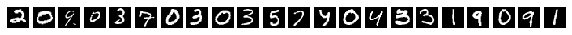

In [45]:
fig = plt.figure(figsize=(10,10))
for i in range(1,23):
  ax = fig.add_subplot(1,22,i)
  # ax.set_title(elems[i-1])
  ax.axis('off')
  plt.imshow(np.reshape(Xtest[i-1,:],(28,28)),cmap='gray')
plt.show()